In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np

In [2]:
page = 1
while page != 201:
    url = f"https://www.amazon.in/Bluetooth-Wireless-Supports-Cancellation-Resistant/product-reviews/B09G6LTQ8Q/ref=cm_cr_dp_d_show_all_btm?pageNumber={page}"
    print(url)
    page = page + 1

https://www.amazon.in/Bluetooth-Wireless-Supports-Cancellation-Resistant/product-reviews/B09G6LTQ8Q/ref=cm_cr_dp_d_show_all_btm?pageNumber=1
https://www.amazon.in/Bluetooth-Wireless-Supports-Cancellation-Resistant/product-reviews/B09G6LTQ8Q/ref=cm_cr_dp_d_show_all_btm?pageNumber=2
https://www.amazon.in/Bluetooth-Wireless-Supports-Cancellation-Resistant/product-reviews/B09G6LTQ8Q/ref=cm_cr_dp_d_show_all_btm?pageNumber=3
https://www.amazon.in/Bluetooth-Wireless-Supports-Cancellation-Resistant/product-reviews/B09G6LTQ8Q/ref=cm_cr_dp_d_show_all_btm?pageNumber=4
https://www.amazon.in/Bluetooth-Wireless-Supports-Cancellation-Resistant/product-reviews/B09G6LTQ8Q/ref=cm_cr_dp_d_show_all_btm?pageNumber=5
https://www.amazon.in/Bluetooth-Wireless-Supports-Cancellation-Resistant/product-reviews/B09G6LTQ8Q/ref=cm_cr_dp_d_show_all_btm?pageNumber=6
https://www.amazon.in/Bluetooth-Wireless-Supports-Cancellation-Resistant/product-reviews/B09G6LTQ8Q/ref=cm_cr_dp_d_show_all_btm?pageNumber=7
https://www.a

<b>Getting titles of customer reviews from the webpages</b>

In [ ]:
page = 1

# Creating an empty list called titles for appending it with Titles of reviews
titles = []
# Running the loop for 200 pages, which is the total count of customer reviews webpages
while page != 201:
    
    # Setting the url link on amazon
    url = f"https://www.amazon.in/Bluetooth-Wireless-Supports-Cancellation-Resistant/product-reviews/B09G6LTQ8Q/ref=cm_cr_dp_d_show_all_btm?pageNumber={page}"
    response = requests.get(url)
    html = response.content
    # Using the default parser lxml
    soup = bs(html, "lxml")
    
    # Iterating for anchor element in soup, with class 'review-title-content'
    for title in soup.find_all("a", class_="review-title-content"):
        titles.append(title.get_text(strip=True))
    page = page + 1

<b>Getting review bodies/content from the webpages</b> 

In [22]:
page = 1

# Creating an empty list called titles for appending it with the review content
reviews = []

while page != 201:
    url = f"https://www.amazon.in/Bluetooth-Wireless-Supports-Cancellation-Resistant/product-reviews/B09G6LTQ8Q/ref=cm_cr_dp_d_show_all_btm?pageNumber={page}"
    response = requests.get(url)
    html = response.content
    soup = bs(html, "lxml")
    for review in soup.find_all("span", {'data-hook': 'review-body'}):
        reviews.append(review.get_text(strip=True))
    page = page + 1

<b>Getting customer names from the webpages</b>

In [ ]:
#df = pd.DataFrame()

In [ ]:
#df['Customer Name'] = names
#df

In [ ]:
#df[df['Customer Name'] == 'Lucky']

In [ ]:
#df = df[:2030]
#df.drop_duplicates(inplace = True)
#len(df)

<b>Creating a DataFrame and adding a column for the titles of reviews</b>

In [14]:
df2 = pd.DataFrame()
df2['Review Title'] = titles
df2

,Review Title
0,Today i receive the Oppo Enco Buds
1,Not getting auto-connected within 3 days
2,Awesome!
3,Good Product but Used Product I Received
4,Echo heard by callers on other end.
...,...
1545,Great one
1546,Got ..... Into expectation
1547,Best in the price range
1548,Best Quality


<b>Creating another DataFrame for the Review bodies</b>

In [26]:
df3 = pd.DataFrame()
df3['Review'] = reviews
df3 = df3[:1550]
df3

,Review
0,"I am satisfied with this product, this is my f..."
1,The media could not be loaded.Update: Amazon r...
2,I've owned many Bluetooth headsets but this is...
3,The media could not be loaded.The Product is n...
4,Too much echo reported by many people on other...
...,...
1545,The best budget buds in the market
1546,Like very much.....
1547,Nice balanced sound performance.Battery backup...
1548,Value for money


In [25]:
# Calling a random review 
df3.iloc[1549]

Review    There is no noise cancellation in voice calls ...
Name: 1549, dtype: object

<b>CONCATENATING THE TWO DFs</b>

In [32]:
data = pd.concat([df2, df3], axis = 1)
data.head()

,Review Title,Review
0,Today i receive the Oppo Enco Buds,"I am satisfied with this product, this is my f..."
1,Not getting auto-connected within 3 days,The media could not be loaded.Update: Amazon r...
2,Awesome!,I've owned many Bluetooth headsets but this is...
3,Good Product but Used Product I Received,The media could not be loaded.The Product is n...
4,Echo heard by callers on other end.,Too much echo reported by many people on other...



\
# CLEANING THE REVIEW TEXT

In [35]:
import string
import re

In [33]:
# Defining a function that takes everything from A-Z, substitutes unwanted characters, and turns text into lower case
def clean_text(text):
    
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = "".join([c for c in text if c not in string.punctuation])
    text = text.lower()
    return text

In [36]:
data['Cleaned_text'] = data['Review'].apply(clean_text)
data.head()

,Review Title,Review,Cleaned_text
0,Today i receive the Oppo Enco Buds,"I am satisfied with this product, this is my f...",i am satisfied with this product this is my f...
1,Not getting auto-connected within 3 days,The media could not be loaded.Update: Amazon r...,the media could not be loaded update amazon r...
2,Awesome!,I've owned many Bluetooth headsets but this is...,i ve owned many bluetooth headsets but this is...
3,Good Product but Used Product I Received,The media could not be loaded.The Product is n...,the media could not be loaded the product is n...
4,Echo heard by callers on other end.,Too much echo reported by many people on other...,too much echo reported by many people on other...


In [38]:
# Importing nltk and downloading the punkt module for tokenizing

import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize

C:\Users\Prateek\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prateek\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [39]:
# Dowloading a list of commonly used words such as 'the', 'a', 'an', 'in' etc, which add no value to our analysis

nltk.download("stopwords")
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prateek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
# Downloading WordnetLemmatizer that groups together the different inflected forms of a word to analyze as a single item 

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wn = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prateek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
# Creating a list called corpus to have all relevant words in one place
corpus = []

for x in range(0, len(data)):
    words = word_tokenize(data['Cleaned_text'][x],'english')
    words = [wn.lemmatize(word) for word in words if word not in set(stoplist)]
    words = " ".join(words)
    corpus.append(words)

In [44]:
data['Corpus'] = corpus
#data.drop(columns = 'Cleaned_text', inplace = True)
data.drop(columns = 'Review', inplace = True)
data.head()

,Review Title,Corpus
0,Today i receive the Oppo Enco Buds,satisfied product first tws writing review bas...
1,Not getting auto-connected within 3 days,medium could loaded update amazon return pick ...
2,Awesome!,owned many bluetooth headset best one far supe...
3,Good Product but Used Product I Received,medium could loaded product doubt best amazon ...
4,Echo heard by callers on other end.,much echo reported many people end e people li...


In [51]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

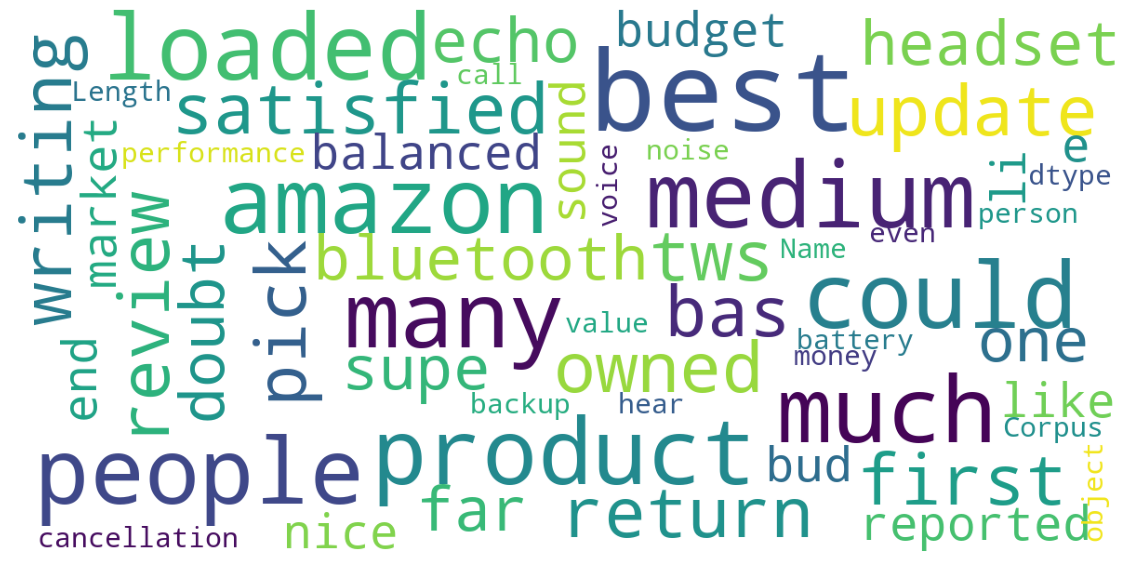

In [55]:
# Defining a function called Mywordcloud to visualize 'Corpus' using a wordcloud
def Mywordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stoplist,
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 1).generate(str(data))
    
    fig = plt.figure(1, figsize = (20,20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
        
    plt.imshow(wordcloud)
    plt.show()
    
Mywordcloud(data['Corpus'])